Chapter 17  
# Gaussian Discriminant Analysis 
*Machine Learning Made Easy and Visual with Python*

## Initialization

In [3]:
import numpy as np  # Import NumPy for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for enhanced plotting
from matplotlib.colors import ListedColormap  # For creating custom color maps
from sklearn import datasets  # Import datasets from scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # LDA classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  # QDA classifier

## Visualization function

In [5]:
def plot_results(X, y, y_predict, xx1, xx2, Fig_title):
    """
    Visualize classification results for two-feature data.
    
    Parameters:
    X          : Feature data
    y          : True labels
    y_predict  : Predicted labels on mesh grid
    xx1, xx2   : Meshgrid coordinates
    Fig_title  : Title for the figure
    """
    
    # Create color maps for regions and points
    rgb = [[255, 238, 255],  # light red for background
           [219, 238, 244],  # light blue for background
           [228, 228, 228]]  # light gray for background
    rgb = np.array(rgb) / 255.
    
    cmap_light = ListedColormap(rgb)  # Light color map for decision regions
    
    cmap_bold = [[255, 51, 0],  # red for points
                 [0, 153, 255],  # blue for points
                 [138, 138, 138]]  # gray for points
    cmap_bold = np.array(cmap_bold) / 255.
    
    fig, ax = plt.subplots()  # Create figure and axes
    
    # Plot the predicted decision regions
    plt.contourf(xx1, xx2, y_predict, cmap=cmap_light)
    
    # Plot decision boundaries for each class
    plt.contour(xx1, xx2, y_predict, levels=[0, 1, 2], colors=np.array([0, 68, 138]) / 255.)
    
    # Plot the actual data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0,
                    linewidth=1, edgecolor=[1, 1, 1])
    
    # Set axis limits, labels, title, and grid
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.title(Fig_title)
    plt.xlabel(iris.feature_names[0])  # Sepal length
    plt.ylabel(iris.feature_names[1])  # Sepal width
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
    plt.tight_layout()
    plt.axis('equal')  # Equal aspect ratio for x and y
  

## Load the Iris dataset

In [7]:
iris = datasets.load_iris()

In [8]:
# Use only the first two features: sepal length and sepal width
X = iris.data[:, 0:2]
y = iris.target

## Generate mesh grid for visualization

In [10]:
h = 0.02  # Step size for mesh grid
x1_min, x1_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                       np.arange(x2_min, x2_max, h))

## Initialize classifiers

In [12]:
lda = LinearDiscriminantAnalysis()  # LDA: assumes shared covariance, linear boundaries
qda = QuadraticDiscriminantAnalysis()  # QDA: allows separate covariance, quadratic boundaries

## Fit classifiers to the data

In [14]:
lda.fit(X, y)
qda.fit(X, y)

# Flatten meshgrid for query points
q = np.c_[xx1.ravel(), xx2.ravel()]

## Predict and visualize LDA results

C:\Users\james\AppData\Local\Temp\ipykernel_21068\657984709.py:35: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],


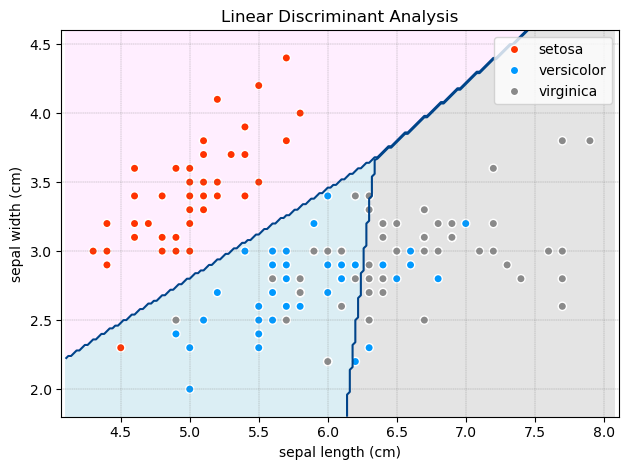

In [16]:
y_predict_LDA = lda.predict(q)  # Predict labels for each grid point using LDA
y_predict_LDA = y_predict_LDA.reshape(xx1.shape)  # Reshape to grid shape
Fig_title = 'Linear Discriminant Analysis'
plot_results(X, y, y_predict_LDA, xx1, xx2, Fig_title)

## Predict and visualize QDA results

C:\Users\james\AppData\Local\Temp\ipykernel_21068\657984709.py:35: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],


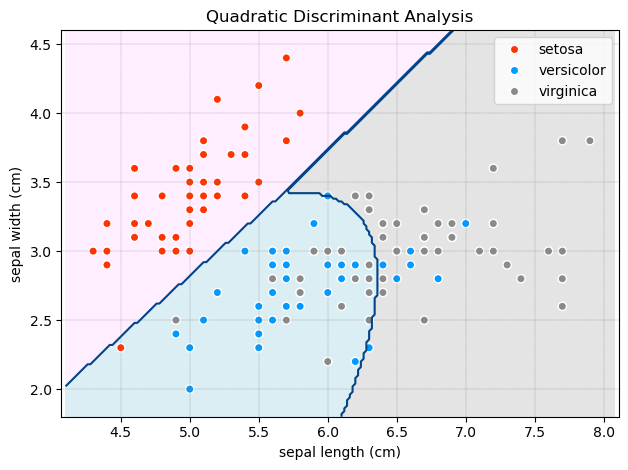

In [18]:
y_predict_QDA = qda.predict(q)  # Predict labels for each grid point using QDA
y_predict_QDA = y_predict_QDA.reshape(xx1.shape)  # Reshape to grid shape
Fig_title = 'Quadratic Discriminant Analysis'
plot_results(X, y, y_predict_QDA, xx1, xx2, Fig_title)